In [ ]:
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pandas as pd
from sklearn.model_selection import train_test_split as split
from sklearn.preprocessing import StandardScaler

In [ ]:
# load the dataset
df = pd.read_csv("/content/employee_performance_pro.csv")
df.head(5)

,EmployeeID,Name,Gender,Age,Department,JobRole,EducationLevel,JoiningDate,CountryCode,Country,...,LastLeaveDate,LeaveDayName,ProjectsHandled,TrainingHours,CustomerSatisfaction,LastPromotionYear,YearsAtCompany,WorkLifeBalanceScore,PerformanceRating,AttritionRisk
0,1,Steven Barnett,Other,57,Finance,Auditor,2,2016-05-05,91,India,...,2024-07-03,Wednesday,13,16,NaN,2020,9,1.90,4,No
1,2,Christopher Benson,Female,26,Sales,Sales Executive,2,2014-08-20,1,Canada,...,2024-01-05,Friday,15,44,8.0,2014,11,5.03,1,Yes
2,3,Norman Lane,Other,59,Support,Helpdesk,1,2010-05-17,1,Canada,...,2024-11-27,Wednesday,7,62,7.0,2012,15,4.83,4,No
3,4,Rita Walker,Female,43,HR,HR Executive,3,2015-06-20,49,Germany,...,2024-07-15,Monday,15,8,NaN,2016,10,4.60,4,No
4,5,Judith Ware,Male,52,Sales,Account Manager,3,2019-08-20,49,Germany,...,2024-12-17,Tuesday,10,57,8.0,2022,6,3.73,4,No


In [ ]:
df.info() # check for null values and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   EmployeeID             500 non-null    int64  
 1   Name                   500 non-null    object 
 2   Gender                 500 non-null    object 
 3   Age                    500 non-null    int64  
 4   Department             500 non-null    object 
 5   JobRole                500 non-null    object 
 6   EducationLevel         500 non-null    int64  
 7   JoiningDate            500 non-null    object 
 8   CountryCode            500 non-null    int64  
 9   Country                500 non-null    object 
 10  PhoneNumber            500 non-null    int64  
 11  MonthlySalary          500 non-null    int64  
 12  OvertimeHoursPerMonth  500 non-null    int64  
 13  LeavesTaken            500 non-null    int64  
 14  LastLeaveDate          500 non-null    object 
 15  LeaveD

In [ ]:
df.shape # check the shape of the dataset

(500, 24)

In [ ]:
df.isnull().sum()   # check for null values in each column

,0
EmployeeID,0
Name,0
Gender,0
Age,0
Department,0
JobRole,0
EducationLevel,0
JoiningDate,0
CountryCode,0
Country,0


<Axes: >

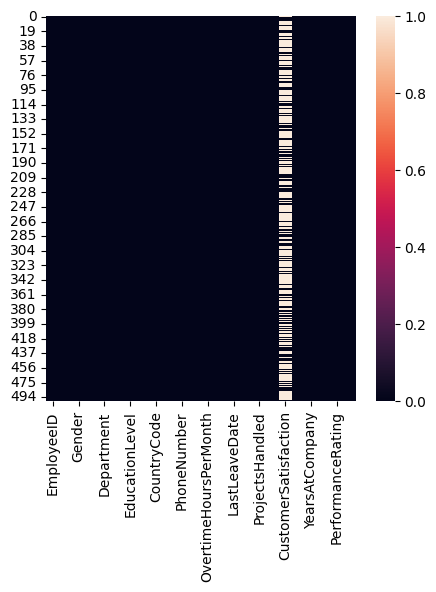

In [ ]:
plt.figure(figsize = (5,5)) # visualize null values using heatmap
sns.heatmap(df.isnull()) # heatmap for null values

<Axes: xlabel='OvertimeHoursPerMonth'>

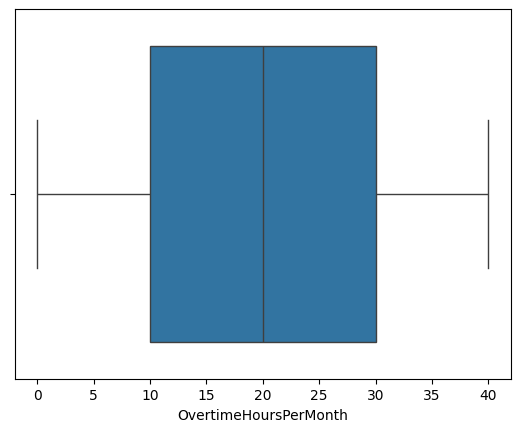

In [ ]:
df['OvertimeHoursPerMonth'] = pd.to_numeric(df['OvertimeHoursPerMonth'], errors = 'coerce') # convert to numeric, coercing errors to NaN

sns.boxplot(x = 'OvertimeHoursPerMonth' , data = df) # boxplot to visualize outliers in OvertimeHoursPerMonth

<Axes: xlabel='EducationLevel'>

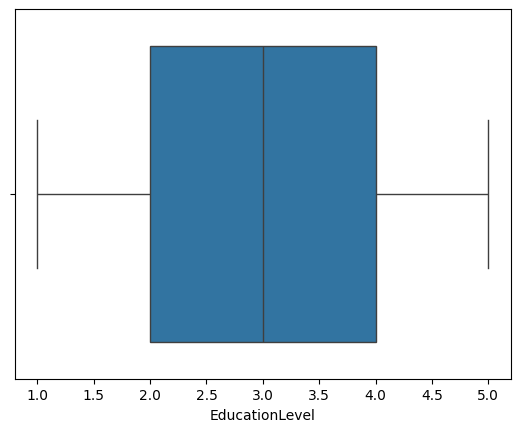

In [ ]:
df['EducationLevel'] = pd.to_numeric(df['EducationLevel'], errors = 'coerce') # convert EducationLevel to numeric
sns.boxplot(x = 'EducationLevel' , data = df) # boxplot to visualize outliers in EducationLevel

<Axes: xlabel='EducationLevel', ylabel='PerformanceRating'>

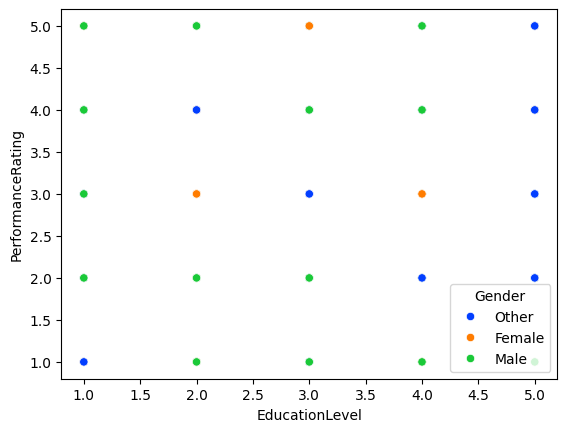

In [ ]:
# scatter plot to visualize relationship between EducationLevel and PerformanceRating
sns.scatterplot(data=df , x = 'EducationLevel' , y = 'PerformanceRating' , hue = 'Gender', palette ='bright') 

In [ ]:
# Identify outliers in OvertimeHoursPerMonth using IQR method
df['OvertimeHoursPerMonth'] = pd.to_numeric(df['OvertimeHoursPerMonth'], errors = 'coerce')
data = df.dropna(subset = ["OvertimeHoursPerMonth"])
Q1 = np.percentile(data["OvertimeHoursPerMonth"] , 25)
Q3 = np.percentile(data["OvertimeHoursPerMonth"] , 75)
IQR = Q3 - Q1
# Calculate bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Filter out the outliers
outliers = data[(df["OvertimeHoursPerMonth"]< lower_bound) | (data ["OvertimeHoursPerMonth"] > upper_bound)]

print("outliers :\n" , outliers)

outliers :
 Empty DataFrame
Columns: [EmployeeID, Name, Gender, Age, Department, JobRole, EducationLevel, JoiningDate, CountryCode, Country, PhoneNumber, MonthlySalary, OvertimeHoursPerMonth, LeavesTaken, LastLeaveDate, LeaveDayName, ProjectsHandled, TrainingHours, CustomerSatisfaction, LastPromotionYear, YearsAtCompany, WorkLifeBalanceScore, PerformanceRating, AttritionRisk]
Index: []

[0 rows x 24 columns]


In [ ]:
df.shape # check the shape of the dataset


(500, 24)

In [ ]:
df.info() # check for null values and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   EmployeeID             500 non-null    int64  
 1   Name                   500 non-null    object 
 2   Gender                 500 non-null    object 
 3   Age                    500 non-null    int64  
 4   Department             500 non-null    object 
 5   JobRole                500 non-null    object 
 6   EducationLevel         500 non-null    int64  
 7   JoiningDate            500 non-null    object 
 8   CountryCode            500 non-null    int64  
 9   Country                500 non-null    object 
 10  PhoneNumber            500 non-null    int64  
 11  MonthlySalary          500 non-null    int64  
 12  OvertimeHoursPerMonth  500 non-null    int64  
 13  LeavesTaken            500 non-null    int64  
 14  LastLeaveDate          500 non-null    object 
 15  LeaveD

In [ ]:
X = df.drop(columns = ['OvertimeHoursPerMonth']) # features
y = df[['OvertimeHoursPerMonth']] # target variable

In [ ]:
X.columns # check feature columns

Index(['EmployeeID', 'Name', 'Gender', 'Age', 'Department', 'JobRole',
       'EducationLevel', 'JoiningDate', 'CountryCode', 'Country',
       'PhoneNumber', 'MonthlySalary', 'LeavesTaken', 'LastLeaveDate',
       'LeaveDayName', 'ProjectsHandled', 'TrainingHours',
       'CustomerSatisfaction', 'LastPromotionYear', 'YearsAtCompany',
       'WorkLifeBalanceScore', 'PerformanceRating', 'AttritionRisk'],
      dtype='object')

In [ ]:
y.columns # check target variable column

Index(['OvertimeHoursPerMonth'], dtype='object')

In [ ]:
y.head(2) # display first 2 rows of target variable

,OvertimeHoursPerMonth
0,33
1,24


In [ ]:
# split the dataset into training and testing sets
X_train , X_test , y_train , y_test = split(X, y , train_size = 0.8 , random_state = 42)
X_train.shape

(400, 23)

In [ ]:
# check the shape of the target variable training set
y_train.shape

(400, 1)

In [ ]:
# print the shapes of training and testing sets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(400, 23)
(100, 23)
(400, 1)
(100, 1)


In [ ]:
# alternative way to split the dataset using train_test_split
from sklearn.model_selection import train_test_split
X = df[['OvertimeHoursPerMonth']]
y = df[['EducationLevel']]
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42)

In [ ]:
# feature scaling using StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.fit_transform(X_test)

In [ ]:
# import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# create Decision Tree Regressor model
model = DecisionTreeRegressor()

In [ ]:
# fit the model on training data
model.fit(X_train , y_train)

DecisionTreeRegressor()

In [ ]:
# make predictions on the test set
y_pred = model.predict(X_test)

In [ ]:
# evaluate the model using R-squared metric
from sklearn.metrics import r2_score

In [ ]:
# calculate R-squared score
r2_score(y_test , y_pred)*100

1.3608422144420484

In [ ]:
# import LinearRegression
from sklearn.linear_model import LinearRegression

In [ ]:
# create Linear Regression model
model = LinearRegression()
model.fit(X_train_sc , y_train)

LinearRegression()

In [ ]:
# make predictions on the test set
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.fit_transform(X_test)

In [ ]:
# display first 10 rows of X_train

X_train[:10]

,OvertimeHoursPerMonth
249,5
433,19
19,2
322,34
332,16
56,16
301,5
229,4
331,10
132,22


In [ ]:
# check the dataframe info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   EmployeeID             500 non-null    int64  
 1   Name                   500 non-null    object 
 2   Gender                 500 non-null    object 
 3   Age                    500 non-null    int64  
 4   Department             500 non-null    object 
 5   JobRole                500 non-null    object 
 6   EducationLevel         500 non-null    int64  
 7   JoiningDate            500 non-null    object 
 8   CountryCode            500 non-null    int64  
 9   Country                500 non-null    object 
 10  PhoneNumber            500 non-null    int64  
 11  MonthlySalary          500 non-null    int64  
 12  OvertimeHoursPerMonth  500 non-null    int64  
 13  LeavesTaken            500 non-null    int64  
 14  LastLeaveDate          500 non-null    object 
 15  LeaveD

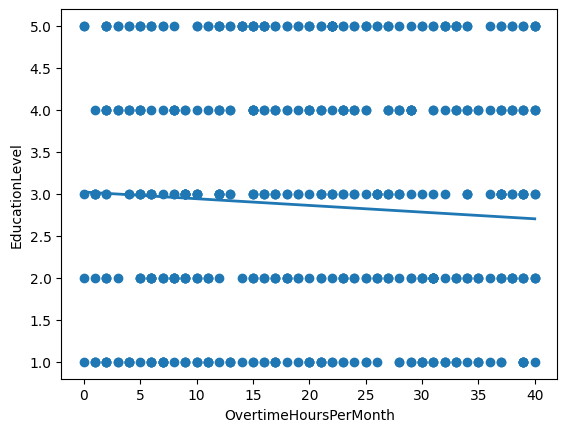

In [ ]:
# visualize the regression results 
plt.scatter(X.values , y.values  , label = "Actual data")
x_line = np.linspace(X.min().item(), X.max().item(), 100).reshape(-1,1)
y_line = model.predict(x_line)
plt.plot(x_line , y_line , linewidth = 2 , label = "Regression line")
plt.xlabel("OvertimeHoursPerMonth")
plt.ylabel("EducationLevel")
plt.show()


This plot shows that Education Level does not meaningfully change with Overtime Hours. The points are spread evenly across all education levels, and the trend line is almost flat. This means there is no real relationship—employees with any education level work similar amounts of overtime.

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


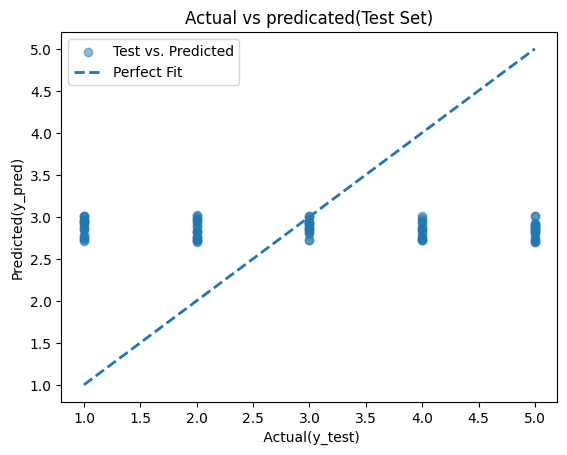

In [ ]:
# visualize Actual vs Predicted for test set
y_pred_test = model.predict(X_test).ravel()
plt.scatter(y_test.values.ravel(), y_pred_test , alpha = 0.5 , label = "Test vs. Predicted")
mn,mx = y_test.values.min() , y_test.values.max()
plt.plot([mn , mx], [mn , mx], linestyle = "--", linewidth = 2, label = "Perfect Fit")
plt.xlabel(" Actual(y_test)")
plt.ylabel("Predicted(y_pred)")
plt.title("Actual vs predicated(Test Set)")
plt.legend()
plt.show()

This plot shows that the model’s predictions are almost the same value every time, no matter what the actual education level is. The points cluster around ~3.0 instead of following the perfect-fit line. This means the model cannot learn the relationship and simply predicts the average for all cases — indicating very poor predictive performance.